In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('bank-full.csv',sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
categorical_cols=['job','marital','education','default','housing','contact','month','poutcome']

In [6]:
categorical_cols_2=['job','marital','education','default','housing','month']

In [7]:
for col in categorical_cols:
    print(f"Unknown entries in {col} column :{np.sum((df[col]=='unknown'))}")

Unknown entries in job column :288
Unknown entries in marital column :0
Unknown entries in education column :1857
Unknown entries in default column :0
Unknown entries in housing column :0
Unknown entries in contact column :13020
Unknown entries in month column :0
Unknown entries in poutcome column :36959


In [8]:
#Replacing all unknown entries in categorical columns by NaN
for col in categorical_cols:
    df[col].replace('unknown',np.nan,inplace=True)

/tmp/ipykernel_42174/4057595245.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace('unknown',np.nan,inplace=True)


In [9]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [10]:
for col in categorical_cols:
  print(f"Unique entries in {col} : {df[col].unique()}")

Unique entries in job : ['management' 'technician' 'entrepreneur' 'blue-collar' nan 'retired'
 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid' 'student']
Unique entries in marital : ['married' 'single' 'divorced']
Unique entries in education : ['tertiary' 'secondary' nan 'primary']
Unique entries in default : ['no' 'yes']
Unique entries in housing : ['yes' 'no']
Unique entries in contact : [nan 'cellular' 'telephone']
Unique entries in month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique entries in poutcome : [nan 'failure' 'other' 'success']


In [11]:
#Filling NaN values in categorical columns with the most frequent occuring entries in the columns
for col in categorical_cols_2:
  df[col].fillna(df[col].mode().iloc[0],inplace=True)

/tmp/ipykernel_42174/2580867713.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode().iloc[0],inplace=True)


In [12]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,secondary,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,blue-collar,single,secondary,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [13]:
for col in categorical_cols:
    print(f"No of categories in {col} is {len(df[col].unique())}")

No of categories in job is 11
No of categories in marital is 3
No of categories in education is 3
No of categories in default is 2
No of categories in housing is 2
No of categories in contact is 3
No of categories in month is 12
No of categories in poutcome is 4


In [14]:
for entry in df['job']:
    if(entry=='student' or entry=='housemaid'):
         entry ='unemployed'

In [15]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,secondary,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,blue-collar,single,secondary,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [16]:
#There are not nan values in non categorical columns too 
for col in df.columns:
    print(f"No of NaN entries in {col} column: {np.sum((df[col]=='unknown'))}") 


No of NaN entries in age column: 0
No of NaN entries in job column: 0
No of NaN entries in marital column: 0
No of NaN entries in education column: 0
No of NaN entries in default column: 0
No of NaN entries in balance column: 0
No of NaN entries in housing column: 0
No of NaN entries in loan column: 0
No of NaN entries in contact column: 0
No of NaN entries in day column: 0
No of NaN entries in month column: 0
No of NaN entries in duration column: 0
No of NaN entries in campaign column: 0
No of NaN entries in pdays column: 0
No of NaN entries in previous column: 0
No of NaN entries in poutcome column: 0
No of NaN entries in y column: 0


In [17]:
months = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
education = {'primary': 1, 'secondary': 2, 'tertiary': 3}

for col, mapping in zip(['month', 'education'], [months, education]):
    df[col].replace(mapping, inplace=True)


/tmp/ipykernel_42174/253749872.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].replace(mapping, inplace=True)
/tmp/ipykernel_42174/253749872.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].replace(mapping, inplace=True)


In [18]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,3,no,2143,yes,no,NaN,5,5,261,1,-1,0,NaN,no
1,44,technician,single,2,no,29,yes,no,NaN,5,5,151,1,-1,0,NaN,no
2,33,entrepreneur,married,2,no,2,yes,yes,NaN,5,5,76,1,-1,0,NaN,no
3,47,blue-collar,married,2,no,1506,yes,no,NaN,5,5,92,1,-1,0,NaN,no
4,33,blue-collar,single,2,no,1,no,no,NaN,5,5,198,1,-1,0,NaN,no


In [19]:
df.sort_values(by=['month', 'education', 'balance'], ascending=[True, True, False], inplace=True)

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28030,55,unemployed,married,1,no,8585,no,no,telephone,28,1,201,2,-1,0,NaN,no
42693,79,retired,married,1,no,8556,no,no,telephone,18,1,326,2,272,2,success,yes
27760,60,retired,married,1,no,8025,no,no,cellular,28,1,194,1,-1,0,NaN,no
42724,38,unemployed,married,1,no,7005,yes,no,cellular,25,1,696,1,202,2,success,yes
42636,34,blue-collar,married,1,no,6718,no,no,cellular,13,1,278,4,97,1,other,no


In [21]:
df['pdays']

28030     -1
42693    272
27760     -1
42724    202
42636     97
        ... 
27717     -1
27725     -1
42425     -1
42505    199
42507     -1
Name: pdays, Length: 45211, dtype: int64

In [22]:
# Convert pdays to "contacted" or "not contacted"
df['pdays'] = df['pdays'].apply(lambda x: 'contacted' if x != -1 else 'not_contacted')
df['pdays'] = df['pdays'].apply(lambda x: 1 if x == 'contacted' else 0)


In [23]:
df['pdays']

28030    0
42693    1
27760    0
42724    1
42636    1
        ..
27717    0
27725    0
42425    0
42505    1
42507    0
Name: pdays, Length: 45211, dtype: int64

In [24]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28030,55,unemployed,married,1,no,8585,no,no,telephone,28,1,201,2,0,0,NaN,no
42693,79,retired,married,1,no,8556,no,no,telephone,18,1,326,2,1,2,success,yes
27760,60,retired,married,1,no,8025,no,no,cellular,28,1,194,1,0,0,NaN,no
42724,38,unemployed,married,1,no,7005,yes,no,cellular,25,1,696,1,1,2,success,yes
42636,34,blue-collar,married,1,no,6718,no,no,cellular,13,1,278,4,1,1,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27717,38,management,divorced,3,no,0,yes,yes,cellular,4,12,18,1,0,0,NaN,no
27725,38,management,married,3,no,0,yes,no,telephone,12,12,136,1,0,0,NaN,no
42425,61,management,married,3,no,0,yes,yes,cellular,7,12,85,2,0,0,NaN,no
42505,46,management,married,3,no,0,yes,no,cellular,17,12,155,1,1,2,failure,no


In [25]:
col = ['default','housing','loan','y']
def convert(x):
    return x.map({'yes':1,'no':0})
df[col] = df[col].apply(convert)

In [26]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
28030,55,unemployed,married,1,0,8585,0,0,telephone,28,1,201,2,0,0,NaN,0
42693,79,retired,married,1,0,8556,0,0,telephone,18,1,326,2,1,2,success,1
27760,60,retired,married,1,0,8025,0,0,cellular,28,1,194,1,0,0,NaN,0
42724,38,unemployed,married,1,0,7005,1,0,cellular,25,1,696,1,1,2,success,1
42636,34,blue-collar,married,1,0,6718,0,0,cellular,13,1,278,4,1,1,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27717,38,management,divorced,3,0,0,1,1,cellular,4,12,18,1,0,0,NaN,0
27725,38,management,married,3,0,0,1,0,telephone,12,12,136,1,0,0,NaN,0
42425,61,management,married,3,0,0,1,1,cellular,7,12,85,2,0,0,NaN,0
42505,46,management,married,3,0,0,1,0,cellular,17,12,155,1,1,2,failure,0


In [27]:
df['month'].astype("category").value_counts()

month
5     13766
7      6895
8      6247
6      5341
11     3970
4      2932
2      2649
1      1403
10      738
9       579
3       477
12      214
Name: count, dtype: int64

In [28]:
print(df['month'].unique())

[ 1  2  3  4  5  6  7  8  9 10 11 12]


In [29]:
categorical = df.select_dtypes(include=['object'])
categorical.head()

,job,marital,contact,poutcome
28030,unemployed,married,telephone,NaN
42693,retired,married,telephone,success
27760,retired,married,cellular,NaN
42724,unemployed,married,cellular,success
42636,blue-collar,married,cellular,other


In [30]:
# dummy variables of all categorical columns
dummies = pd.get_dummies(categorical,drop_first=True)
dummies = dummies.astype(int)
dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,contact_telephone,poutcome_other,poutcome_success
28030,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0
42693,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1
27760,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
42724,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1
42636,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [31]:
# concatination of two dataframes 'bank' and 'dummies'
df = pd.concat([df,dummies],axis=1)
df.drop(columns=categorical.columns,axis=1,inplace=True)

In [32]:
df.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,contact_telephone,poutcome_other,poutcome_success
28030,55,1,0,8585,0,0,28,1,201,2,...,0,0,0,0,1,1,0,1,0,0
42693,79,1,0,8556,0,0,18,1,326,2,...,0,0,0,0,0,1,0,1,0,1
27760,60,1,0,8025,0,0,28,1,194,1,...,0,0,0,0,0,1,0,0,0,0
42724,38,1,0,7005,1,0,25,1,696,1,...,0,0,0,0,1,1,0,0,0,1
42636,34,1,0,6718,0,0,13,1,278,4,...,0,0,0,0,0,1,0,0,1,0


In [33]:
df.shape

(45211, 28)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 28030 to 42507
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                45211 non-null  int64
 1   education          45211 non-null  int64
 2   default            45211 non-null  int64
 3   balance            45211 non-null  int64
 4   housing            45211 non-null  int64
 5   loan               45211 non-null  int64
 6   day                45211 non-null  int64
 7   month              45211 non-null  int64
 8   duration           45211 non-null  int64
 9   campaign           45211 non-null  int64
 10  pdays              45211 non-null  int64
 11  previous           45211 non-null  int64
 12  y                  45211 non-null  int64
 13  job_blue-collar    45211 non-null  int64
 14  job_entrepreneur   45211 non-null  int64
 15  job_housemaid      45211 non-null  int64
 16  job_management     45211 non-null  int64
 17  job_retired  

In [35]:
check_out = df[['age','balance','day','duration','campaign','pdays','previous','month','education']]
check_out.head()

,age,balance,day,duration,campaign,pdays,previous,month,education
28030,55,8585,28,201,2,0,0,1,1
42693,79,8556,18,326,2,1,2,1,1
27760,60,8025,28,194,1,0,0,1,1
42724,38,7005,25,696,1,1,2,1,1
42636,34,6718,13,278,4,1,1,1,1


In [36]:
check_out.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99])

,age,balance,day,duration,campaign,pdays,previous,month,education
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,0.182633,0.580323,6.144655,2.142664
std,10.618762,3044.765829,8.322476,257.527812,3.098021,0.386369,2.303441,2.408034,0.652218
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,0.000000,0.000000,5.000000,2.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,0.000000,0.000000,6.000000,2.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,0.000000,0.000000,8.000000,3.000000
90%,56.000000,3574.000000,28.000000,548.000000,5.000000,1.000000,2.000000,10.000000,3.000000
95%,59.000000,5768.000000,29.000000,751.000000,8.000000,1.000000,3.000000,11.000000,3.000000
99%,71.000000,13164.900000,31.000000,1269.000000,16.000000,1.000000,8.900000,11.000000,3.000000


Defaulting to user installation because normal site-packages is not writeable


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<AxesSubplot:>

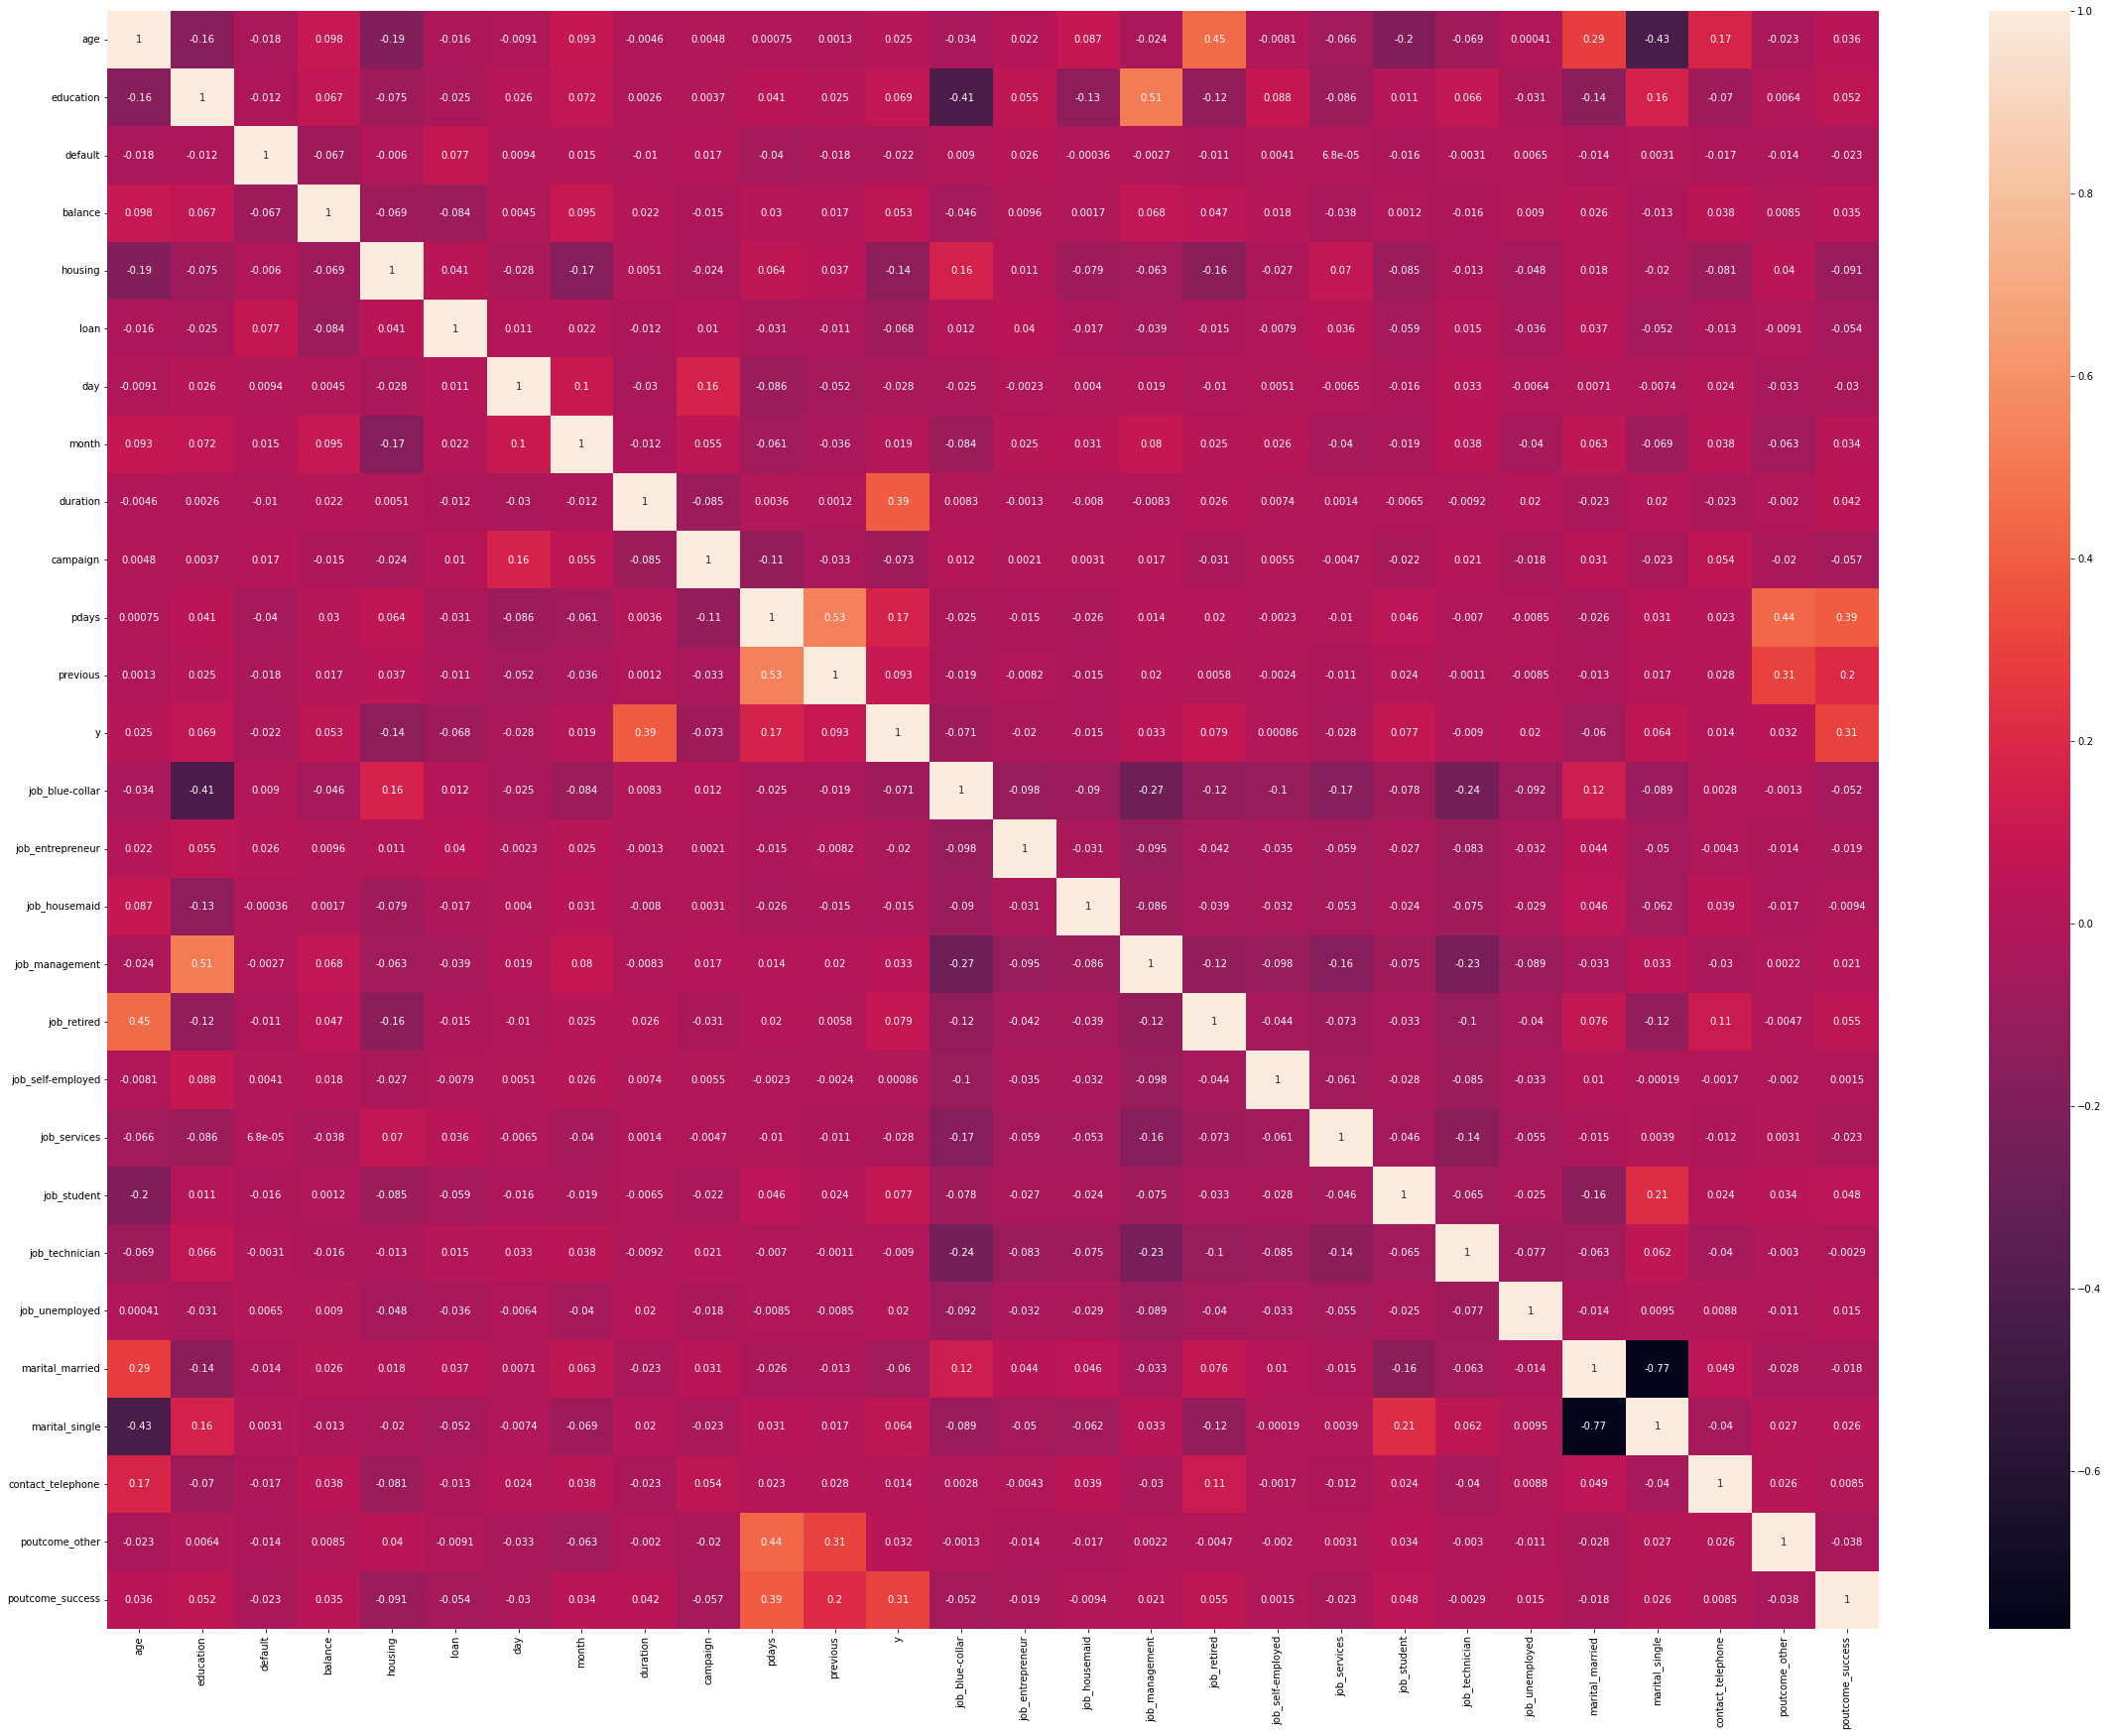

In [37]:
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),annot=True)
#We are not gonna drop any column because none of the column is very highly correlated with the target column

In [38]:
# X will have all the features
X = df.drop(['y'],axis=1)
# Y will have the target variable
Y = df['y']

In [39]:
X.head()

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,contact_telephone,poutcome_other,poutcome_success
28030,55,1,0,8585,0,0,28,1,201,2,...,0,0,0,0,1,1,0,1,0,0
42693,79,1,0,8556,0,0,18,1,326,2,...,0,0,0,0,0,1,0,1,0,1
27760,60,1,0,8025,0,0,28,1,194,1,...,0,0,0,0,0,1,0,0,0,0
42724,38,1,0,7005,1,0,25,1,696,1,...,0,0,0,0,1,1,0,0,0,1
42636,34,1,0,6718,0,0,13,1,278,4,...,0,0,0,0,0,1,0,0,1,0


In [40]:
Y.head()

28030    0
42693    1
27760    0
42724    1
42636    0
Name: y, dtype: int64

In [41]:
!pip install statsmodels
import statsmodels.api as sm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, precision_recall_curve

Defaulting to user installation because normal site-packages is not writeable


In [42]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

In [43]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36168 entries, 2096 to 20592
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   age                36168 non-null  int64
 1   education          36168 non-null  int64
 2   default            36168 non-null  int64
 3   balance            36168 non-null  int64
 4   housing            36168 non-null  int64
 5   loan               36168 non-null  int64
 6   day                36168 non-null  int64
 7   month              36168 non-null  int64
 8   duration           36168 non-null  int64
 9   campaign           36168 non-null  int64
 10  pdays              36168 non-null  int64
 11  previous           36168 non-null  int64
 12  job_blue-collar    36168 non-null  int64
 13  job_entrepreneur   36168 non-null  int64
 14  job_housemaid      36168 non-null  int64
 15  job_management     36168 non-null  int64
 16  job_retired        36168 non-null  int64
 17  job_self-emplo

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# List of columns to scale
#columns_to_scale = ['age', 'balance','month', 'day', 'duration', 'campaign', 'pdays', 'previous', 'education']
columns_to_scale = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
# Initialize the scaler
scaler = MinMaxScaler()  # or MinMaxScaler()

# Apply scaling
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


In [45]:
# logistic regression model
logm = sm.GLM(y_train,(sm.add_constant(x_train)),family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                36168
Model:                            GLM   Df Residuals:                    36140
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9264.0
Date:                Fri, 30 Aug 2024   Deviance:                       18528.
Time:                        01:53:42   Pearson chi2:                 6.87e+06
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1871
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -3.1931      0.174    -18.312      0.000      -3.535      -2.851
age                  -0.0007      0.002     -0.284      0.777      -0.005       0.004
education             0.2539      0.039      6.429      0.000       0.176       0.331
default              -0.0061      0.171     -0.036      0.972      -0.341       0.329
balance             1.93e-05   5.38e-06      3.589      0.000    8.76e-06    2.98e-05
housing              -0.9394      0.043    -21.860      0.000      -1.024      -0.855
loan                 -0.5337      0.064     -8.337      0.000      -0.659      -0.408
day                  -0.0049      0.002     -2.054      0.040      -0.009      -0.000
month                -0.0061      0.008     -0.800      0.424      -0.021       0.009
duration              0.0040   6.85e-05     57.690      0.000       0.004       0.004
campaign             -0.0955      0.011     -8.991      0.000      -0.116      -0.075
pdays                 0.5758      0.062      9.262      0.000       0.454       0.698
previous              0.0079      0.006      1.260      0.208      -0.004       0.020
job_blue-collar      -0.3714      0.076     -4.874      0.000      -0.521      -0.222
job_entrepreneur     -0.4193      0.133     -3.148      0.002      -0.680      -0.158
job_housemaid        -0.5251      0.146     -3.590      0.000      -0.812      -0.238
job_management       -0.1427      0.074     -1.915      0.055      -0.289       0.003
job_retired           0.4192      0.101      4.133      0.000       0.220       0.618
job_self-employed    -0.3384      0.121     -2.806      0.005      -0.575      -0.102
job_services         -0.3214      0.091     -3.527      0.000      -0.500      -0.143
job_student           0.5617      0.115      4.869      0.000       0.336       0.788
job_technician       -0.2146      0.074     -2.901      0.004      -0.360      -0.070
job_unemployed       -0.2146      0.122     -1.761      0.078      -0.453       0.024
marital_married      -0.1580      0.064     -2.485      0.013      -0.283      -0.033
marital_single        0.1540      0.072      2.129      0.033       0.012       0.296
contact_telephone     0.1372      0.080      1.721      0.085      -0.019       0.293
poutcome_other        0.1891      0.097      1.951      0.051      -0.001       0.379
poutcome_success      2.2030      0.085     25.809      0.000       2.036       2.370
=====================================================================================
"""

In [46]:
logreg = LogisticRegression()

In [47]:
rfe = RFE(estimator=logreg, n_features_to_select=20)

# Fit RFE
rfe = rfe.fit(x_train, y_train)

/home/nithin/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/nithin/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [48]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('age', False, 3),
 ('education', True, 1),
 ('default', True, 1),
 ('balance', False, 8),
 ('housing', True, 1),
 ('loan', True, 1),
 ('day', False, 4),
 ('month', False, 2),
 ('duration', False, 7),
 ('campaign', True, 1),
 ('pdays', True, 1),
 ('previous', False, 5),
 ('job_blue-collar', True, 1),
 ('job_entrepreneur', True, 1),
 ('job_housemaid', True, 1),
 ('job_management', True, 1),
 ('job_retired', True, 1),
 ('job_self-employed', True, 1),
 ('job_services', True, 1),
 ('job_student', True, 1),
 ('job_technician', True, 1),
 ('job_unemployed', False, 6),
 ('marital_married', True, 1),
 ('marital_single', True, 1),
 ('contact_telephone', True, 1),
 ('poutcome_other', True, 1),
 ('poutcome_success', True, 1)]

In [49]:
col1 = x_train.columns[rfe.support_]
col1

Index(['education', 'default', 'housing', 'loan', 'campaign', 'pdays',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'marital_married', 'marital_single',
       'contact_telephone', 'poutcome_other', 'poutcome_success'],
      dtype='object')

In [50]:
x_train.columns[~rfe.support_]

Index(['age', 'balance', 'day', 'month', 'duration', 'previous',
       'job_unemployed'],
      dtype='object')

In [51]:
x_train_sm = sm.add_constant(x_train[col1])
logm1 = sm.GLM(y_train,x_train_sm, family=sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                36168
Model:                            GLM   Df Residuals:                    36147
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11412.
Date:                Fri, 30 Aug 2024   Deviance:                       22824.
Time:                        01:53:43   Pearson chi2:                 3.76e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.08455
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.9859      0.102    -19.521      0.000      -2.185      -1.787
education             0.2209      0.035      6.290      0.000       0.152       0.290
default              -0.1783      0.159     -1.124      0.261      -0.489       0.133
housing              -0.7295      0.037    -19.577      0.000      -0.803      -0.656
loan                 -0.4679      0.057     -8.163      0.000      -0.580      -0.356
campaign             -0.0967      0.009    -10.626      0.000      -0.115      -0.079
pdays                 0.4124      0.054      7.664      0.000       0.307       0.518
job_blue-collar      -0.2107      0.065     -3.259      0.001      -0.337      -0.084
job_entrepreneur     -0.2635      0.117     -2.245      0.025      -0.494      -0.033
job_housemaid        -0.3666      0.128     -2.861      0.004      -0.618      -0.115
job_management       -0.0715      0.063     -1.142      0.254      -0.194       0.051
job_retired           0.5461      0.078      6.972      0.000       0.393       0.700
job_self-employed    -0.1671      0.106     -1.578      0.114      -0.375       0.040
job_services         -0.2088      0.078     -2.664      0.008      -0.362      -0.055
job_student           0.4334      0.102      4.269      0.000       0.234       0.632
job_technician       -0.1386      0.063     -2.217      0.027      -0.261      -0.016
marital_married      -0.1933      0.056     -3.434      0.001      -0.304      -0.083
marital_single        0.1289      0.060      2.135      0.033       0.011       0.247
contact_telephone     0.0735      0.069      1.069      0.285      -0.061       0.208
poutcome_other        0.2747      0.087      3.161      0.002       0.104       0.445
poutcome_success      2.1479      0.079     27.064      0.000       1.992       2.303
=====================================================================================
"""

In [52]:
# predicted values of the train dataset giving the probability
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

2096     0.188603
40528    0.256433
26818    0.052225
36961    0.099298
39683    0.151546
26179    0.103585
6183     0.084562
11763    0.137755
17241    0.040662
39029    0.064423
dtype: float64

In [53]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18860339, 0.2564332 , 0.05222496, 0.09929758, 0.15154622,
       0.10358549, 0.08456192, 0.13775466, 0.04066156, 0.06442278])

In [54]:
y_train_pred_final = pd.DataFrame({'Sub':y_train.values,'Sub_prob':y_train_pred})
y_train_pred_final['Cust_id'] = y_train.index
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id
0,1,0.188603,2096
1,1,0.256433,40528
2,0,0.052225,26818
3,0,0.099298,36961
4,0,0.151546,39683
5,0,0.103585,26179
6,0,0.084562,6183
7,0,0.137755,11763
8,0,0.040662,17241
9,0,0.064423,39029


In [55]:
y_train_pred_final['predict'] = y_train_pred_final['Sub_prob'].map(lambda x: 1 if x>0.5 else 0)
y_train_pred_final.head(10)

,Sub,Sub_prob,Cust_id,predict
0,1,0.188603,2096,0
1,1,0.256433,40528,0
2,0,0.052225,26818,0
3,0,0.099298,36961,0
4,0,0.151546,39683,0
5,0,0.103585,26179,0
6,0,0.084562,6183,0
7,0,0.137755,11763,0
8,0,0.040662,17241,0
9,0,0.064423,39029,0


In [56]:
# creating confusion matrix for the following prediction
confusion = metrics.confusion_matrix(y_train_pred_final.Sub, y_train_pred_final.predict)
confusion

array([[31623,   335],
       [ 3547,   663]])

In [57]:
print(metrics.accuracy_score(y_train_pred_final.Sub, y_train_pred_final.predict))

0.8926675514266755


In [63]:
TN, FP, FN, TP = confusion.ravel()

In [64]:
recall = TP / (TP + FN)

# Precision
precision = TP / (TP + FP)

# F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1_score}")

Precision: 0.6643286573146293
Recall: 0.15748218527315916
F1 Score: 0.2546082949308756


In [65]:
def draw_roc(actual,probs):
    fpr, tpr, thresholds = metrics.roc_curve(actual, probs, drop_intermediate=False)
    auc_score = metrics.roc_auc_score(actual, probs)
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
    plt.plot([0,1],[0,1],'k--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Reciever operating characterstic example')
    plt.legend(loc='lower right')
    plt.show()
    
    return None

In [66]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Sub, y_train_pred_final.Sub_prob,drop_intermediate=False)

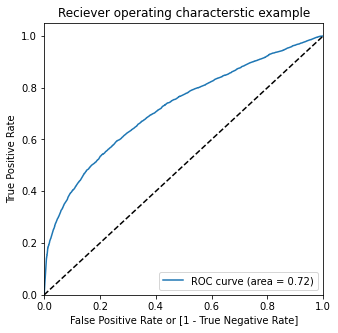

In [67]:
draw_roc(y_train_pred_final.Sub, y_train_pred_final.Sub_prob)